## Visualizing some stuff

In [52]:
# Importing
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import time

In [53]:
def gaussian(X: list, MEAN: float, SIGMA: float) -> list:
    """Calculates f(x) of an input array of x values according to the gaussian density function.

    Args:
        X (list): Function values, that is, x values
        SIGMA (float): Standard deviation of the data
        MEAN (float): Mean of the data

    Returns:
        list: Function values that correspond to the 'xs' input array, that is, f(X).
    """
    
    f_x = (1/(np.sqrt(2*np.pi) * SIGMA)) * np.exp(- 0.5 * np.square(np.asarray(X) - MEAN) / np.square(SIGMA))
    return f_x

In [54]:
# Test
X = np.arange(-4, 5, 0.01)
X2 = np.arange(-4, 5)
Y = gaussian(X, MEAN=0, SIGMA=1)
len(X2)

9

(0.0, 0.5)

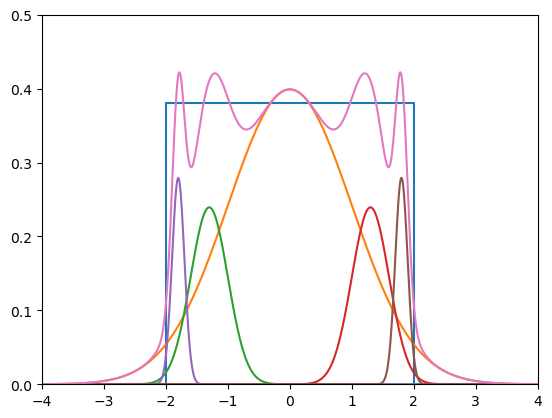

In [55]:
_WEIGHT = 0.18    # Some arbirtary scale factor
_WEIGHT2 = 0.07
Y1 = _WEIGHT * gaussian(X, MEAN=-1.3, SIGMA=0.3)
Y2 = _WEIGHT * gaussian(X, MEAN=1.3, SIGMA=0.3)
Y3 = _WEIGHT2 * gaussian(X, MEAN=-1.8, SIGMA=0.1)
Y4 = _WEIGHT2 * gaussian(X, MEAN=1.8, SIGMA=0.1)
plt.step(X2, [0,0,0,0.38,0.38,0.38,0.38,0,0])   # Step function to approximate
plt.plot(X, Y)
plt.plot(X, Y1)
plt.plot(X, Y2)
plt.plot(X, Y3)
plt.plot(X, Y4)
plt.plot(X, (Y + Y1 + Y2 + Y3 + Y4))
plt.xlim(-4, 4)
plt.ylim(0, 0.5)

## Try machine learning with simple linear model

In [56]:
# TODO: Do X and Y data pairs that resemble simple y=mx. Initialize m=0 and iterate to update m. Use L2 norm as cost function. What is the derivative of that?
# Define data   -   assume f*(x) = mx <-- linear function
X = np.arange(0, 10, 1)
Y = np.arange(0, 10, 1)
print(f"X: {X}")
print(f"Y: {Y}")

X: [0 1 2 3 4 5 6 7 8 9]
Y: [0 1 2 3 4 5 6 7 8 9]


In [57]:
# Init parameter randomly in [0., 1.)
weight = np.random.uniform(-0.5, 2.0)
bias = np.random.uniform(-2.0, 2.0)
_LR = 0.01   # learning rate. Adaptable hyperparameter

# Define cost function J(theta) w/ theta = (w, b). MSE also called L2 loss.
def MSE_Loss(Y: list, Y_hat: list) -> float:
    """Calculates the mean squared error of real and predicted data.

    Args:
        Y (list): Real (target) values.
        Y_hat (list): Predicted values.

    Returns:
        float: MSE loss
    """
    loss = np.mean(np.square(Y - Y_hat))
    return loss

# Define alternative cost function
def MAE_Loss(Y: list, Y_hat: list) -> float:
    """Calculates the mean squared error of real and predicted data.

    Args:
        Y (list): Real (target) values.
        Y_hat (list): Predicted values.

    Returns:
        float: MSE loss
    """
    loss = np.mean(np.square(Y - Y_hat))
    return loss

# Define gradient of the cost/loss function
def gradient(X: list, Y: list, weight: float, bias: float) -> tuple:
    """Calculates the gradient of the loss function J(w) w.r.t the weight w.

    Args:
        X (list): Input values.
        Y (list): Target values.
        weight (float): Current weight parameter.
        bias (float): Current bias parameter.

    Returns:
        tuple: Gradient of the loss function at current value of the weight and bias.
    """
    grad_J_w = np.mean(-2 * weight * (Y - target_function(X, weight, bias)))
    grad_J_b = np.mean(2 * (Y - target_function(X, weight, bias)))
    return grad_J_w, grad_J_b

# Define the target function to be optimized
def target_function(X: list, w: float, b:float) -> list:
    """Target function we want to optimize. Find the optimal weight w depending on the data.

    Args:
        X (list): Input values. Points at which we want to evaluate the target function at.
        w (float): Weight that acts on the input values.
        b (float): Bias that shifts the input on y.

    Returns:
        list: Estimated function values.
    """
    Y_hat = w * X + b
    return Y_hat

# Keep track of loss to monitor convergence
losses = []

In [58]:
# Calculate loss for different w. We know that w=1 should be the minimum.
w_losses = []
search_space_w = np.arange(-6, 7, 0.05) # <-- searching for w in the space [-4, 6] in 0.05 steps
print(len(search_space_w))
for w in tqdm(search_space_w):
    Y_hat = target_function(X, w=w, b=0)   # assume optimal b for now, that is, b = 0. Only searching for optimal w here
    mse_loss = MSE_Loss(Y, Y_hat)
    w_losses.append(mse_loss)

# Calculate loss for different b. We know that b=0 should be the minimum.
b_losses = []
search_space_b = np.arange(-6, 7, 0.05) # <-- searching for w in the space [-4, 5] in 0.05 steps
print(len(search_space_b))
for b in tqdm(search_space_b):
    Y_hat = target_function(X, w=1, b=b)   # assume optimal w for now, that is w = 1. Only searching for optimal b here
    mse_loss = MSE_Loss(Y, Y_hat)
    b_losses.append(mse_loss)

260


100%|██████████| 260/260 [00:00<00:00, 37589.85it/s]


260


100%|██████████| 260/260 [00:00<00:00, 25434.25it/s]


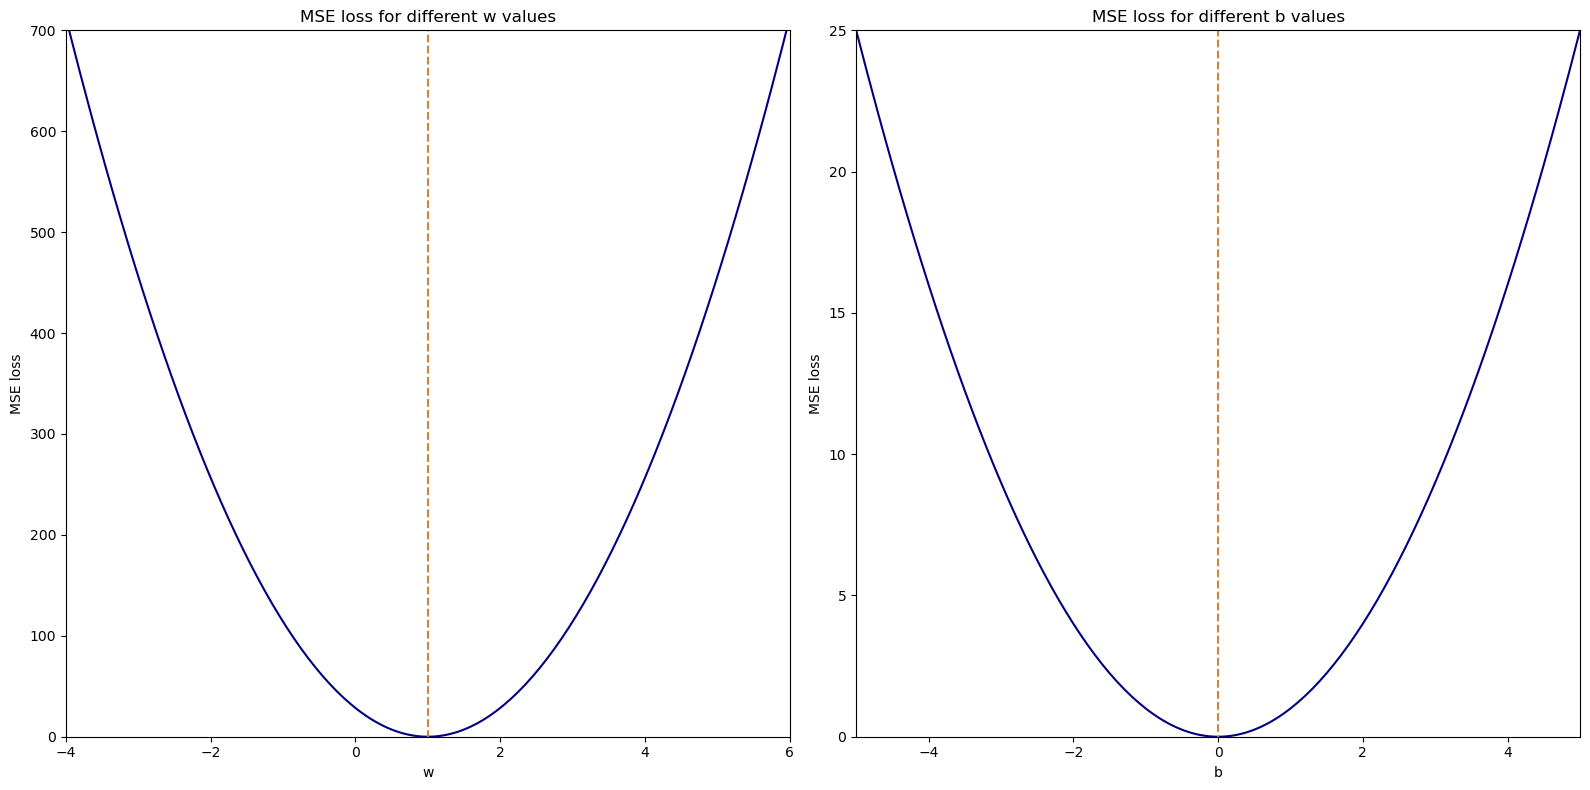

In [59]:
# Plot losses
fig = plt.figure(figsize=(16, 8))
axs1 = fig.add_subplot(1, 2, 1)
axs2 = fig.add_subplot(1, 2, 2)

axs1.set_title("MSE loss for different w values")
axs1.set_xlabel("w")
axs1.set_ylabel("MSE loss")
axs1.plot(search_space_w, w_losses, color="navy")
axs1.set_ylim(0, 700)
axs1.set_xlim(-4, 6)
axs1.vlines(1, -1, 700, colors='peru', linestyles='--')

axs2.set_title("MSE loss for different b values")
axs2.set_xlabel("b")
axs2.set_ylabel("MSE loss")
axs2.plot(search_space_b, b_losses, color="navy")
axs2.set_ylim(0, 25)
axs2.set_xlim(-5, 5)
axs2.vlines(0, -1, 25, colors='peru', linestyles='--')
plt.tight_layout()

In [60]:
# Time it
t0 = time()

# Get losses
XX, YY = np.meshgrid(search_space_w, search_space_b)
losses_w_b = np.zeros_like(XX)

# Now search over both parameters (w, b) simultaneosly
for i in range(len(XX)):
    for j in range(len(XX[0])):
        Y_hat = target_function(X, w = XX[i, j], b=YY[i, j])   # assume optimal b for now, that is, b = 0. Only searching for optimal w here
        mse_loss = MSE_Loss(Y, Y_hat)
        losses_w_b[i, j] = mse_loss

# Get time difference
print(f"Execution time: {(time()- t0):.2f}")

Execution time: 0.85


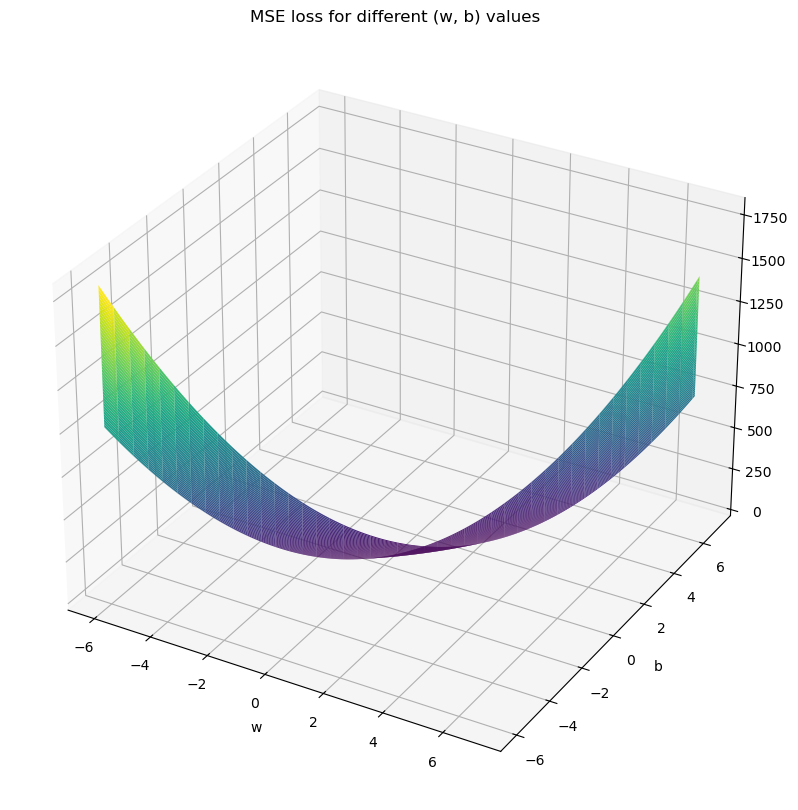

In [61]:
# Plot in 3D
fig = plt.figure(figsize=(10, 10))
axs = fig.add_subplot(1, 1, 1, projection='3d')

axs.set_title("MSE loss for different (w, b) values")
axs.set_xlabel("w")
axs.set_ylabel("b")
axs.plot_surface(search_space_w, search_space_b, losses_w_b, cmap='viridis')

Current weight: 1.4567902203087362
Current bias: -2.060086087838813

Predicted Y: [-2.06008609 -0.60329587  0.85349435  2.31028457  3.76707479  5.22386501
  6.68065523  8.13744545  9.59423567 11.05102589]

Loss: 1.721443291073897
Gradient_w: -0.013198800409375534
Gradient_b: 0.00906019289900124


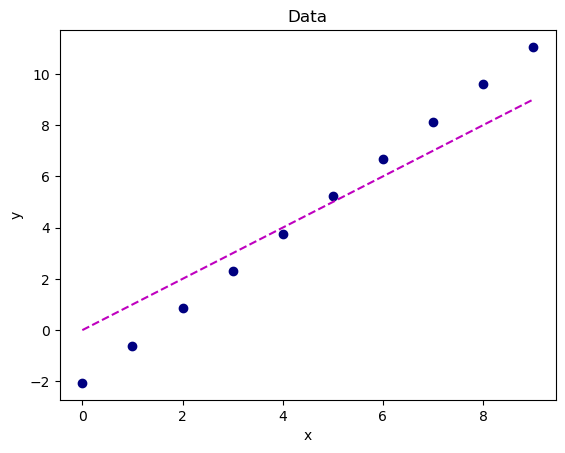

In [130]:
print(f"Current weight: {weight}")
print(f"Current bias: {bias}\n")

# Estimate Y_hat at current state
Y_hat = target_function(X, weight, bias)
print(f"Predicted Y: {Y_hat}\n")

# Calculate loss
loss = MSE_Loss(Y, Y_hat)
print(f"Loss: {loss}")

# Calculate gradient of loss function at current (w, b)
grad_J_w, grad_J_b = gradient(X, Y, weight, bias)
print(f"Gradient_w: {grad_J_w}")
print(f"Gradient_b: {grad_J_b}")

# Update model weight(s)    -   w <- w - lr * dJ/dw && b <- b - lr * dJ/db
weight = weight - _LR * grad_J_w
bias = bias - _LR * grad_J_b

# Plot progress
losses.append(loss)
plt.title("Data")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(X, Y, "m--")
plt.scatter(X, Y_hat, color="navy")

Training took -- 67 -- steps


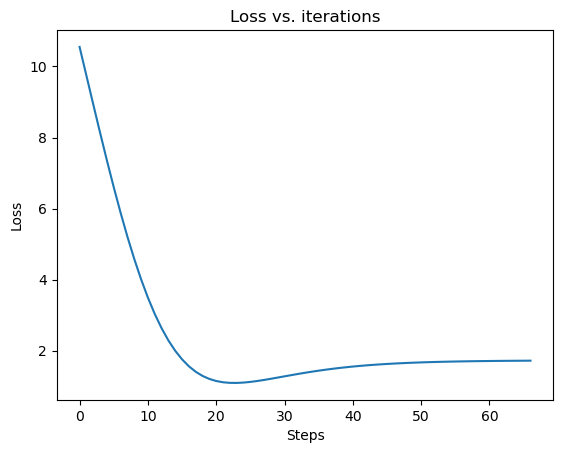

In [133]:
# Plot progress
print(f"Training took -- {len(losses)} -- steps")
steps = np.arange(len(losses))
plt.title("Loss vs. iterations")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.plot(steps, losses)

In [64]:
# TODO: Maybe show (w, b) plane that is minimized?